In [125]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle

import warnings
warnings.filterwarnings('ignore')

### Importing the data

In [126]:
df = pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [127]:
#to search for the presence of null values in the dataset
df.isnull().sum().sum()

0

In [128]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [129]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [130]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [131]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

### Checking the values in the data

In [132]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [133]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [134]:
df['sex'].value_counts() 
#we can consider this to be a non-contributing independent feature, since gender does not determine the salary a person recieves

Male      358
Female     39
Name: sex, dtype: int64

### Data Encoding

In [135]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for obj in df.columns:
    if df[obj].dtypes=="object":
        df[obj] = oe.fit_transform(df[obj].values.reshape(-1,1))
        
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


In [137]:
#converting all the datatypes to float
df = df.astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    float64
 3   yrs.service    397 non-null    float64
 4   sex            397 non-null    float64
 5   salary         397 non-null    float64
dtypes: float64(6)
memory usage: 18.7 KB


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19.0,18.0,1.0,139750.0
1,2.0,1.0,20.0,16.0,1.0,173200.0
2,1.0,1.0,4.0,3.0,1.0,79750.0
3,2.0,1.0,45.0,39.0,1.0,115000.0
4,2.0,1.0,40.0,41.0,1.0,141500.0
...,...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,1.0,103106.0
393,2.0,0.0,31.0,19.0,1.0,150564.0
394,2.0,0.0,42.0,25.0,1.0,101738.0
395,2.0,0.0,25.0,15.0,1.0,95329.0


### Describing the data

In [138]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [139]:
#prints the mean, std, min and max values of the columns.

for i in range(0,5):
    current_column=df.columns[i]
    list_current_col = list(df[current_column].describe())
    print (current_column,':\n','Mean = ',list_current_col[1],'\n','STD = ',list_current_col[2],'\n','Min = ',list_current_col[3],'\n','Max = ',list_current_col[-1],'\n')
    

rank :
 Mean =  1.508816120906801 
 STD =  0.7574864461514098 
 Min =  0.0 
 Max =  2.0 

discipline :
 Mean =  0.5440806045340051 
 STD =  0.4986815683558154 
 Min =  0.0 
 Max =  1.0 

yrs.since.phd :
 Mean =  22.31486146095718 
 STD =  12.887003310964854 
 Min =  1.0 
 Max =  56.0 

yrs.service :
 Mean =  17.614609571788414 
 STD =  13.006023785473102 
 Min =  0.0 
 Max =  60.0 

sex :
 Mean =  0.9017632241813602 
 STD =  0.2980100912766356 
 Min =  0.0 
 Max =  1.0 



### Checking for outliers

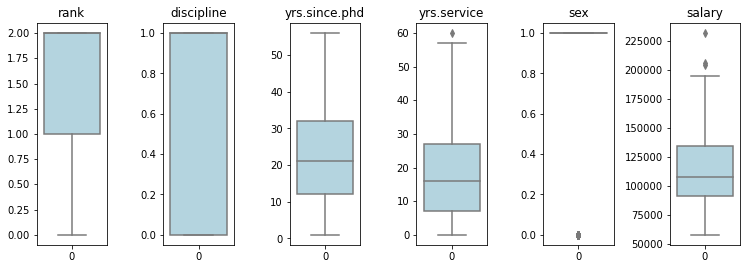

In [140]:
collist=df.columns.values
ncol=8
nrow=4

plt.figure(figsize=(14,14))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='lightblue',orient='v')
    plt.title(df.columns[i])
    plt.tight_layout()

### Skewness

In [141]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

### Visualizing the data

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

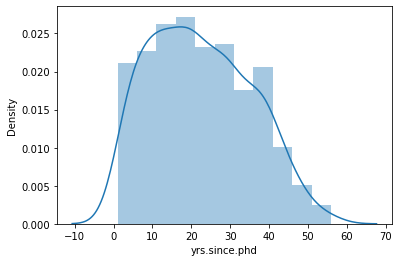

In [142]:
plt.figure(figsize=(6,4))
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

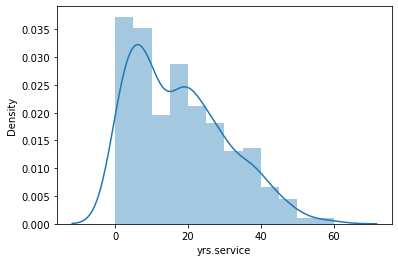

In [143]:
plt.figure(figsize=(6,4))
sns.distplot(df['yrs.service'])

### Correlation and Heat map

In [144]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [145]:
df.corr()['salary'] #correlation of all the columns with respect to the 'salary' column

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

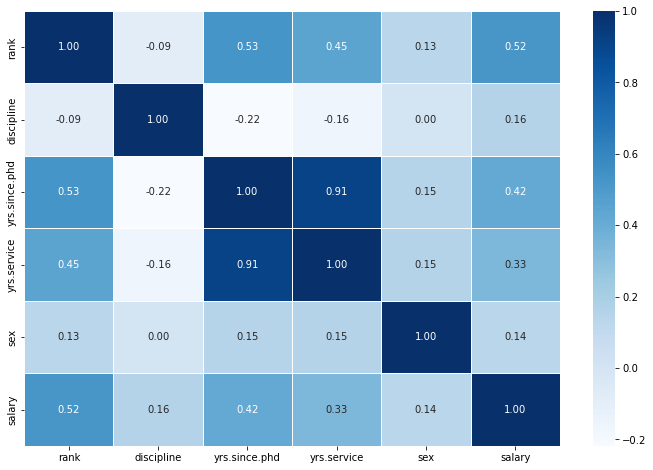

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='w', cmap="Blues", fmt=".2f")

In [147]:
#prints the correlation percentages, minimum correlation and maximum correlation in an understandable manner

correlation_list=[]
correlation_dictionary = {}

for i in range(0,5):
    print ('The correlation percentage between',df.columns[i],'and salary is',round(df.corr()['salary'][i]*100),'%')
    corr_dict={df.columns[i]:round(df.corr()['salary'][i]*100)}
    correlation_dictionary.update(corr_dict)

print ('\nMaximum Correlation:',max(correlation_dictionary,key=correlation_dictionary.get))
print ('\nMinimum Correlation:',min(correlation_dictionary,key=correlation_dictionary.get))

The correlation percentage between rank and salary is 52 %
The correlation percentage between discipline and salary is 16 %
The correlation percentage between yrs.since.phd and salary is 42 %
The correlation percentage between yrs.service and salary is 33 %
The correlation percentage between sex and salary is 14 %

Maximum Correlation: rank

Minimum Correlation: sex


### Dropping the column 'sex' from the dataset

In [148]:
df = df.drop(['sex'],axis=1)
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19.0,18.0,139750.0
1,2.0,1.0,20.0,16.0,173200.0
2,1.0,1.0,4.0,3.0,79750.0
3,2.0,1.0,45.0,39.0,115000.0
4,2.0,1.0,40.0,41.0,141500.0
...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,103106.0
393,2.0,0.0,31.0,19.0,150564.0
394,2.0,0.0,42.0,25.0,101738.0
395,2.0,0.0,25.0,15.0,95329.0


### Removing outliers using zscore

In [149]:
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0.649257,0.915403,0.257550,0.029669,0.860919
1,0.649257,0.915403,0.179854,0.124300,1.966672
2,0.672564,0.915403,1.422982,1.125098,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.918768
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.350418
393,0.649257,1.092415,0.674796,0.106654,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.607502


In [150]:
z=np.abs(zscore(df))
np.where(z>3) #checking if there are data with zscore above 3

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))

In [151]:
z.iloc[131,0] #veryfying by checking random samples from the results

0.6492573856894619

In [152]:
df_new = df[(z<3).all(axis=1)]
df_new #creating a new data base by removing the outliers

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2.0,1.0,19.0,18.0,139750.0
1,2.0,1.0,20.0,16.0,173200.0
2,1.0,1.0,4.0,3.0,79750.0
3,2.0,1.0,45.0,39.0,115000.0
4,2.0,1.0,40.0,41.0,141500.0
...,...,...,...,...,...
392,2.0,0.0,33.0,30.0,103106.0
393,2.0,0.0,31.0,19.0,150564.0
394,2.0,0.0,42.0,25.0,101738.0
395,2.0,0.0,25.0,15.0,95329.0


In [153]:
print ("Size of old dataset = ",df.shape[0])
print ("Size of new dataset = ",df_new.shape[0])
print ("The amount of data dropped = ",df.shape[0]-df_new.shape[0])
print ("Loss percentage =",(df.shape[0]-df_new.shape[0])/df.shape[0]*100,'%')

Size of old dataset =  397
Size of new dataset =  393
The amount of data dropped =  4
Loss percentage = 1.0075566750629723 %


### Seperating the values to x and y

In [154]:
#independent variables
x = df_new.iloc[:,:-1]

#target variable
y = df_new.iloc[:,-1]

### Transforming data to remove skewness

In [155]:
#using power transform

from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [156]:
#using standard scalar

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [157]:
print ("Mean after StandardScalar =",x.mean())
print ("Standard deviation after StandardScalar =",x.std())

Mean after StandardScalar = -2.2599959788807256e-17
Standard deviation after StandardScalar = 1.0


## Model Building

### Linear Regression

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score

lr = LinearRegression()

for i in range(0,1300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print ("At random state: ",i)
        print ("Training accuracy is: ",round(r2_score(y_train,pred_train)*100,1))
        print ("Test accuracy is: ",round(r2_score(y_test,pred_test)*100,1))

At random state:  30
Training accuracy is:  42.2
Test accuracy is:  42.2
At random state:  105
Training accuracy is:  41.5
Test accuracy is:  41.5
At random state:  152
Training accuracy is:  42.2
Test accuracy is:  42.2
At random state:  234
Training accuracy is:  41.9
Test accuracy is:  41.9
At random state:  675
Training accuracy is:  42.0
Test accuracy is:  42.0
At random state:  692
Training accuracy is:  42.0
Test accuracy is:  42.0
At random state:  828
Training accuracy is:  42.1
Test accuracy is:  42.1
At random state:  1250
Training accuracy is:  42.3
Test accuracy is:  42.3


In [205]:
#to confirm the accuracy of 42.3% at random state 1250 

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1250,test_size=0.2)
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
print ("The accuracy is: ",round(r2_score(y_test,pred_test)*100,1))

linear_regression_unbalanced = round(r2_score(y_test,pred_test)*100,1)

The accuracy is:  42.3


#### Cross Validation - Linear Regression

In [160]:
from sklearn.model_selection import cross_val_score

pred_test_accuracy = r2_score(y_test,pred_test)

for val in range(2,10):
    l_score = cross_val_score(lr,x,y,cv=val)
    lscore_mean = l_score.mean()
    print ("At CV:",val)
    print ("The CV score is:",round((lscore_mean)*100,1))
    print ("The accuracy is:",round((pred_test_accuracy)*100,1))

At CV: 2
The CV score is: 37.3
The accuracy is: 42.3
At CV: 3
The CV score is: 36.1
The accuracy is: 42.3
At CV: 4
The CV score is: 37.4
The accuracy is: 42.3
At CV: 5
The CV score is: 36.1
The accuracy is: 42.3
At CV: 6
The CV score is: 37.9
The accuracy is: 42.3
At CV: 7
The CV score is: 37.2
The accuracy is: 42.3
At CV: 8
The CV score is: 38.6
The accuracy is: 42.3
At CV: 9
The CV score is: 36.5
The accuracy is: 42.3


In [161]:
#applying lasso and ridge cross validation
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

lassocv = LassoCV(alphas = None, cv=8, max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

print ("The Lasso CV score is",round(lasso_reg.score(x_test,y_test)*100,1),"%")

The Lasso CV score is 42.3 %


In [162]:
alpha_r = np.random.uniform(low=0,high=10,size=(50,))
ridgecv = RidgeCV(alphas = alpha_r, cv=8, normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_

ridge_reg = Ridge(ridgecv.alpha_)
ridge_reg.fit(x_train,y_train)
print ("The Ridge CV score is",round(ridge_reg.score(x_test,y_test)*100,1),"%")

The Ridge CV score is 42.3 %


### KNN Regressor

In [204]:
from sklearn.neighbors import KNeighborsRegressor

KN = KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
KN.fit(x_train,y_train)
KN_pred = KN.predict(x_test)
print ("The KNN score is",round(r2_score(KN_pred,y_test)*100,2),"%")

KNN_regression_unbalanced = round(r2_score(KN_pred,y_test)*100,2)

The KNN score is -2.84 %


### Random Forest Regressor 

In [206]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,bootstrap=True,random_state=117)
RFR.fit(x_train,y_train)
RFR_pred = RFR.predict(x_test)
print ("The RFR score is",round(r2_score(RFR_pred,y_test)*100,2),"%")

RFR_regression_unbalanced = round(r2_score(RFR_pred,y_test)*100,2)

The RFR score is -4.14 %


### SVM Regressor

In [207]:
from sklearn.svm import SVR

svr = SVR(kernel='poly', gamma=1, epsilon=3)
svr.fit(x_train,y_train)
SVR_pred = svr.predict(x_test)
print ("The SVR score is",round(r2_score(SVR_pred,y_test)*100,2),"%")

SVR_regression_unbalanced = round(r2_score(SVR_pred,y_test)*100,2)

The SVR score is -2069.91 %


### Actual Values vs Predicted Values  

In [166]:
actual_ = np.array(y_test)
predicted_ = np.array(lr.predict(x_test))
error_residual = actual_-predicted_

actual_vs_pred_df = pd.DataFrame({'Actual Values':actual_,'Predicted Values':np.round(predicted_),'Error/Residual':np.round(error_residual)})
actual_vs_pred_df.head()

,Actual Values,Predicted Values,Error/Residual
0,103750.0,90967.0,12783.0
1,113341.0,85794.0,27547.0
2,150564.0,121233.0,29331.0
3,70700.0,89763.0,-19063.0
4,105000.0,97676.0,7324.0


# The above salary prediction model was created without balancing the dataset. 

In [168]:
data = pd.read_csv('Salaries.csv')
data['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [169]:
prof = data[data['rank']=='Prof']
asst_prof = data[data['rank']=='AsstProf']
assoc_prof = data[data['rank']=='AssocProf']
prof

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
6,Prof,B,30,23,Male,175000
...,...,...,...,...,...,...
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738


In [170]:
from sklearn.utils import resample

asst_upsampled = resample(asst_prof,replace=True,n_samples=199,random_state=27)
merged_asst_upsample = pd.concat([asst_prof,asst_upsampled])
assoc_upsampled = resample(assoc_prof,replace=True,n_samples=202,random_state=27)
merged_assoc_upsample = pd.concat([assoc_prof,assoc_upsampled])

#concatenating the dataframes together
data_m=pd.concat([merged_asst_upsample,merged_assoc_upsample,prof])
data_m['rank'].value_counts()

AsstProf     266
AssocProf    266
Prof         266
Name: rank, dtype: int64

In [171]:
#we can see that the values are now balanced, but the index is jumbled and there are duplicates present.
data_m

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
2,AsstProf,B,4,3,Male,79750
11,AsstProf,B,7,2,Male,79800
12,AsstProf,B,1,1,Male,77700
13,AsstProf,B,2,0,Male,78000
27,AsstProf,B,5,3,Male,82379
...,...,...,...,...,...,...
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738


In [172]:
data_m.reset_index(drop=True)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,AsstProf,B,4,3,Male,79750
1,AsstProf,B,7,2,Male,79800
2,AsstProf,B,1,1,Male,77700
3,AsstProf,B,2,0,Male,78000
4,AsstProf,B,5,3,Male,82379
...,...,...,...,...,...,...
793,Prof,A,30,19,Male,151292
794,Prof,A,33,30,Male,103106
795,Prof,A,31,19,Male,150564
796,Prof,A,42,25,Male,101738


### Data Encoding the balaced dataset

In [173]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for obj in data_m.columns:
    if data_m[obj].dtypes=="object":
        data_m[obj] = oe.fit_transform(data_m[obj].values.reshape(-1,1))
        
data_m

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
2,1.0,1.0,4,3,1.0,79750
11,1.0,1.0,7,2,1.0,79800
12,1.0,1.0,1,1,1.0,77700
13,1.0,1.0,2,0,1.0,78000
27,1.0,1.0,5,3,1.0,82379
...,...,...,...,...,...,...
391,2.0,0.0,30,19,1.0,151292
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738


### Converting all the columns to float

In [174]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 2 to 395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           798 non-null    float64
 1   discipline     798 non-null    float64
 2   yrs.since.phd  798 non-null    int64  
 3   yrs.service    798 non-null    int64  
 4   sex            798 non-null    float64
 5   salary         798 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 43.6 KB


In [175]:
data_m = data_m.astype(float)
data_m.info()
data_m

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 2 to 395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           798 non-null    float64
 1   discipline     798 non-null    float64
 2   yrs.since.phd  798 non-null    float64
 3   yrs.service    798 non-null    float64
 4   sex            798 non-null    float64
 5   salary         798 non-null    float64
dtypes: float64(6)
memory usage: 43.6 KB


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
2,1.0,1.0,4.0,3.0,1.0,79750.0
11,1.0,1.0,7.0,2.0,1.0,79800.0
12,1.0,1.0,1.0,1.0,1.0,77700.0
13,1.0,1.0,2.0,0.0,1.0,78000.0
27,1.0,1.0,5.0,3.0,1.0,82379.0
...,...,...,...,...,...,...
391,2.0,0.0,30.0,19.0,1.0,151292.0
392,2.0,0.0,33.0,30.0,1.0,103106.0
393,2.0,0.0,31.0,19.0,1.0,150564.0
394,2.0,0.0,42.0,25.0,1.0,101738.0


### Describing the data

In [176]:
data_m.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.000000,0.548872,16.600251,12.622807,0.870927,99869.384712
std,0.817009,0.497918,12.726220,12.390219,0.335491,26982.313391
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,0.000000,0.000000,7.000000,3.000000,1.000000,79762.500000
50%,1.000000,1.000000,12.000000,8.000000,1.000000,92700.000000
75%,2.000000,1.000000,25.000000,19.000000,1.000000,109650.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [177]:
#prints the mean, std, min and max values of the columns.

for i in range(0,5):
    current_column=data_m.columns[i]
    list_current_col = list(data_m[current_column].describe())
    print (current_column,':\n','Mean = ',list_current_col[1],'\n','STD = ',list_current_col[2],'\n','Min = ',list_current_col[3],'\n','Max = ',list_current_col[-1],'\n')
    

rank :
 Mean =  1.0 
 STD =  0.8170086515838499 
 Min =  0.0 
 Max =  2.0 

discipline :
 Mean =  0.5488721804511278 
 STD =  0.49791785408167905 
 Min =  0.0 
 Max =  1.0 

yrs.since.phd :
 Mean =  16.600250626566417 
 STD =  12.726220472533326 
 Min =  1.0 
 Max =  56.0 

yrs.service :
 Mean =  12.62280701754386 
 STD =  12.390218797393286 
 Min =  0.0 
 Max =  60.0 

sex :
 Mean =  0.8709273182957393 
 STD =  0.33549064013268587 
 Min =  0.0 
 Max =  1.0 



### Checking for outliers

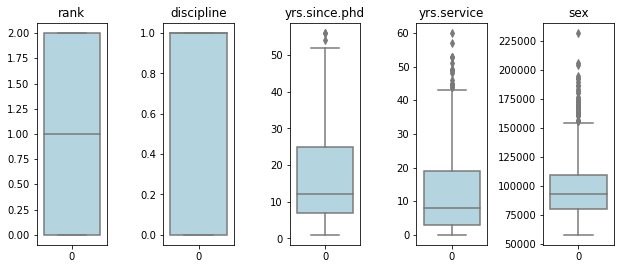

In [178]:
collist=df.columns.values
ncol=8
nrow=4

plt.figure(figsize=(14,14))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data=data_m[collist[i]],color='lightblue',orient='v')
    plt.title(data_m.columns[i])
    plt.tight_layout()

### Skewness

In [179]:
data_m.skew()

rank             0.000000
discipline      -0.196799
yrs.since.phd    0.965730
yrs.service      1.297298
sex             -2.216809
salary           1.325943
dtype: float64

### Visualizing the data

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

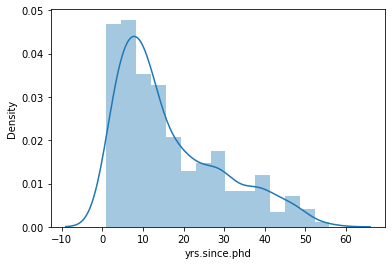

In [180]:
plt.figure(figsize=(6,4))
sns.distplot(data_m['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

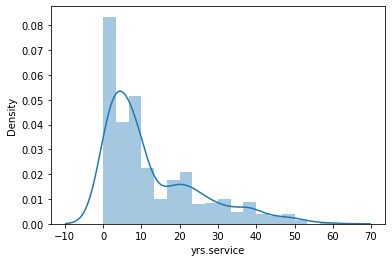

In [181]:
plt.figure(figsize=(6,4))
sns.distplot(data_m['yrs.service'])

### Correlation and Heat map

In [182]:
data_m.corr()['salary']

rank             0.516447
discipline       0.216980
yrs.since.phd    0.473046
yrs.service      0.409089
sex              0.168877
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

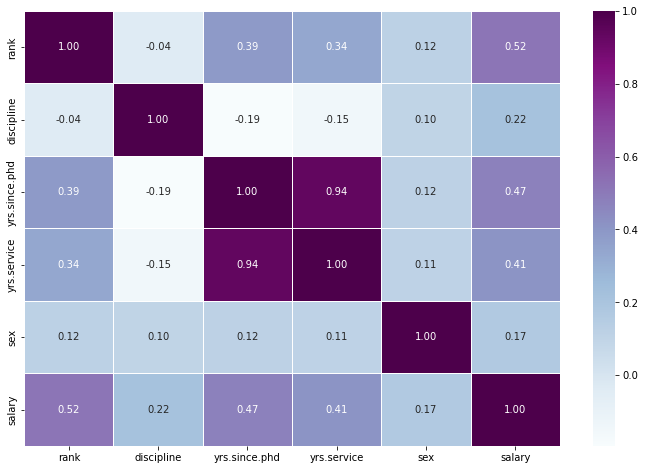

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(data_m.corr(),annot=True,linecolor='w',linewidths=0.5,cmap='BuPu',fmt='.2f')

In [184]:
#prints the correlation percentages, minimum correlation and maximum correlation in an understandable manner

correlation_list=[]
correlation_dictionary = {}

for i in range(0,5):
    print ('The correlation percentage between',data_m.columns[i],'and salary is',round(data_m.corr()['salary'][i]*100),'%')
    corr_dict={data_m.columns[i]:round(data_m.corr()['salary'][i]*100)}
    correlation_dictionary.update(corr_dict)

print ('\nMaximum Correlation:',max(correlation_dictionary,key=correlation_dictionary.get))
print ('\nMinimum Correlation:',min(correlation_dictionary,key=correlation_dictionary.get))

The correlation percentage between rank and salary is 52 %
The correlation percentage between discipline and salary is 22 %
The correlation percentage between yrs.since.phd and salary is 47 %
The correlation percentage between yrs.service and salary is 41 %
The correlation percentage between sex and salary is 17 %

Maximum Correlation: rank

Minimum Correlation: sex


In [185]:
data_m = data_m.drop(['sex'],axis=1)
data_m

,rank,discipline,yrs.since.phd,yrs.service,salary
2,1.0,1.0,4.0,3.0,79750.0
11,1.0,1.0,7.0,2.0,79800.0
12,1.0,1.0,1.0,1.0,77700.0
13,1.0,1.0,2.0,0.0,78000.0
27,1.0,1.0,5.0,3.0,82379.0
...,...,...,...,...,...
391,2.0,0.0,30.0,19.0,151292.0
392,2.0,0.0,33.0,30.0,103106.0
393,2.0,0.0,31.0,19.0,150564.0
394,2.0,0.0,42.0,25.0,101738.0


### Removing outliers using zscore

In [186]:
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0.649257,0.915403,0.257550,0.029669,0.860919
1,0.649257,0.915403,0.179854,0.124300,1.966672
2,0.672564,0.915403,1.422982,1.125098,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.918768
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.350418
393,0.649257,1.092415,0.674796,0.106654,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.607502


In [187]:
z=np.abs(zscore(data_m))
np.where(z>3) #checking if there are data with zscore above 3

(array([305, 371, 432, 559, 580, 612, 612, 631, 647, 685, 702, 710, 716,
        744, 744, 762, 762, 773, 791], dtype=int64),
 array([3, 3, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 3, 4, 2, 4, 4, 4],
       dtype=int64))

In [188]:
z.iloc[305,3] #confirming the presence of zscore>3 

3.2608395734028046

In [189]:
data_m_new = data_m[(z<3).all(axis=1)]
data_m_new #creating a new data base by removing the outliers

,rank,discipline,yrs.since.phd,yrs.service,salary
2,1.0,1.0,4.0,3.0,79750.0
11,1.0,1.0,7.0,2.0,79800.0
12,1.0,1.0,1.0,1.0,77700.0
13,1.0,1.0,2.0,0.0,78000.0
27,1.0,1.0,5.0,3.0,82379.0
...,...,...,...,...,...
391,2.0,0.0,30.0,19.0,151292.0
392,2.0,0.0,33.0,30.0,103106.0
393,2.0,0.0,31.0,19.0,150564.0
394,2.0,0.0,42.0,25.0,101738.0


In [190]:
print ("Size of old dataset = ",data_m.shape[0])
print ("Size of new dataset = ",data_m_new.shape[0])
print ("The amount of data dropped = ",data_m.shape[0]-data_m_new.shape[0])
print ("Loss percentage =",round((data_m.shape[0]-data_m_new.shape[0])/data_m.shape[0]*100),'%')

Size of old dataset =  798
Size of new dataset =  782
The amount of data dropped =  16
Loss percentage = 2 %


### Seperating the values to x and y

In [191]:
#independent variables
x_m = data_m_new.iloc[:,:-1] #x_m stands for x_merged

#target variable
y_m = data_m_new.iloc[:,-1] #y_m -> y_merged

### Transforming data to remove skewness

In [192]:
#using power transform

from sklearn.preprocessing import power_transform
x_m = power_transform(x_m,method='yeo-johnson')
x_m

array([[ 0.1130194 ,  0.90710739, -1.2285631 , -0.80206958],
       [ 0.1130194 ,  0.90710739, -0.66788014, -1.06900745],
       [ 0.1130194 ,  0.90710739, -2.22927537, -1.43132167],
       ...,
       [ 1.19275029, -1.1024053 ,  1.19660931,  0.85579386],
       [ 1.19275029, -1.1024053 ,  1.63858665,  1.15466232],
       [ 1.19275029, -1.1024053 ,  0.89585556,  0.60823393]])

In [193]:
#using standard scalar

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_m = ss.fit_transform(x_m)
x_m

array([[ 0.1130194 ,  0.90710739, -1.2285631 , -0.80206958],
       [ 0.1130194 ,  0.90710739, -0.66788014, -1.06900745],
       [ 0.1130194 ,  0.90710739, -2.22927537, -1.43132167],
       ...,
       [ 1.19275029, -1.1024053 ,  1.19660931,  0.85579386],
       [ 1.19275029, -1.1024053 ,  1.63858665,  1.15466232],
       [ 1.19275029, -1.1024053 ,  0.89585556,  0.60823393]])

In [194]:
print ("Mean after StandardScalar =",x_m.mean())
print ("Standard deviation after StandardScalar =",x_m.std())

Mean after StandardScalar = 1.1357780303070655e-17
Standard deviation after StandardScalar = 1.0


## Model Building

### Linear Regression

In [195]:
for i in range(0,1300):
    x_m_train,x_m_test,y_m_train,y_m_test = train_test_split(x_m,y_m,random_state=i,test_size=0.2)
    lr.fit(x_m_train,y_m_train)
    pred_m_train = lr.predict(x_m_train)
    pred_m_test = lr.predict(x_m_test)
    if round(r2_score(y_m_train,pred_m_train)*100,1)==round(r2_score(y_m_test,pred_m_test)*100,1):
        print ("At random state: ",i)
        print ("Training accuracy is: ",round(r2_score(y_m_train,pred_m_train)*100,1))
        print ("Test accuracy is: ",round(r2_score(y_m_test,pred_m_test)*100,1))

At random state:  208
Training accuracy is:  50.9
Test accuracy is:  50.9
At random state:  370
Training accuracy is:  50.9
Test accuracy is:  50.9
At random state:  598
Training accuracy is:  50.9
Test accuracy is:  50.9
At random state:  1141
Training accuracy is:  51.0
Test accuracy is:  51.0
At random state:  1217
Training accuracy is:  50.9
Test accuracy is:  50.9
At random state:  1283
Training accuracy is:  50.9
Test accuracy is:  50.9


In [209]:
#to confirm the accuracy of 51% at random state 1141

x_m_train,x_m_test,y_m_train,y_m_test = train_test_split(x_m,y_m,random_state=1141,test_size=0.2)
lr.fit(x_m_train,y_m_train)
pred_m_test = lr.predict(x_m_test)
print ("The accuracy of Linear Regression is",round(r2_score(y_m_test,pred_m_test)*100,1),'%')

linear_regression_balanced = round(r2_score(y_m_test,pred_m_test)*100,1)

The accuracy of Linear Regression is 51.0 %


#### Cross Validation - Linear Regression

In [197]:
pred_m_test_accuracy = r2_score(y_m_test,pred_m_test)

for val in range(2,10):
    l_score_m = cross_val_score(lr,x_m,y_m,cv=val)
    lscore_m_mean = l_score_m.mean()
    print ("At CV:",val)
    print ("The CV score is:",round((lscore_m_mean)*100,1))
    print ("The accuracy is:",round((pred_m_test_accuracy)*100,1))

At CV: 2
The CV score is: -418.0
The accuracy is: 51.0
At CV: 3
The CV score is: -949.8
The accuracy is: 51.0
At CV: 4
The CV score is: -114.7
The accuracy is: 51.0
At CV: 5
The CV score is: -57.0
The accuracy is: 51.0
At CV: 6
The CV score is: -76.5
The accuracy is: 51.0
At CV: 7
The CV score is: -55.3
The accuracy is: 51.0
At CV: 8
The CV score is: -49.1
The accuracy is: 51.0
At CV: 9
The CV score is: -58.1
The accuracy is: 51.0


In [198]:
#applying lasso and ridge cross validation

lassocv_m = LassoCV(alphas = None, cv=8, max_iter=1000,normalize=True)
lassocv_m.fit(x_m_train,y_m_train)

alpha_m=lassocv_m.alpha_
lasso_reg_m = Lasso(alpha_m)
lasso_reg_m.fit(x_m_train,y_m_train)

alpha_r_m = np.random.uniform(low=0,high=10,size=(50,))
ridgecv_m = RidgeCV(alphas = alpha_r_m, cv=8, normalize=True)
ridgecv_m.fit(x_m_train,y_m_train)
ridgecv_m.alpha_

ridge_reg_m = Ridge(ridgecv_m.alpha_)
ridge_reg_m.fit(x_m_train,y_m_train)

print ("The Ridge CV score is",round(ridge_reg_m.score(x_m_test,y_m_test)*100,1),"%")
print ("The Lasso CV score is",round(lasso_reg_m.score(x_m_test,y_m_test)*100,1),"%")

The Ridge CV score is 51.0 %
The Lasso CV score is 51.0 %


In [210]:
### KNN Regressor

KN_m = KNeighborsRegressor(n_neighbors=7, algorithm='kd_tree', weights='distance')
KN_m.fit(x_m_train,y_m_train)
KN_m_pred = KN_m.predict(x_m_test)
print ("The KNN score is",round(r2_score(KN_m_pred,y_m_test)*100,2),"%")

KNN_regression_balanced = round(r2_score(KN_m_pred,y_m_test)*100,2)

The KNN score is 44.74 %


In [211]:
### SVM Regressor

svr_m = SVR(kernel='poly', gamma=1, epsilon=3)
svr_m.fit(x_m_train,y_m_train)
SVR_m_pred = svr_m.predict(x_m_test)
print ("The SVR score is",round(r2_score(SVR_m_pred,y_m_test)*100,2),"%")

SVR_regression_balanced = round(r2_score(SVR_m_pred,y_m_test)*100,2)

The SVR score is -1168.18 %


In [214]:
### Random Forest Regressor 

RFR_m = RandomForestRegressor(n_estimators=10,bootstrap=True,random_state=127)
RFR_m.fit(x_m_train,y_m_train)
RFR_m_pred = RFR_m.predict(x_m_test)
print ("The RFR score is",round(r2_score(RFR_m_pred,y_m_test)*100,2),"%")

RFR_regression_balanced = round(r2_score(RFR_m_pred,y_m_test)*100,2)

The RFR score is 49.03 %


In [202]:
actual_m = np.array(y_m_test)
predicted_m = np.array(lr.predict(x_m_test))
error_residual_m = actual_m-predicted_m

actual_vs_pred_m_df = pd.DataFrame({'Actual Values':actual_m,'Predicted Values':np.round(predicted_m),'Error/Residual':np.round(error_residual_m)})
actual_vs_pred_m_df.head()

,Actual Values,Predicted Values,Error/Residual
0,92700.0,92915.0,-215.0
1,82379.0,95023.0,-12644.0
2,74830.0,78663.0,-3833.0
3,83850.0,83483.0,367.0
4,78785.0,87872.0,-9087.0


# Comparing both the models of both the unbalanced and balanced dataset

In [234]:
final = pd.DataFrame({'Model':['Linear Regression','SVR','RFR','KNN'],'Balanced (in %)':[linear_regression_balanced,SVR_regression_balanced,RFR_regression_balanced,KNN_regression_balanced],'Unbalanced (in %)':[linear_regression_unbalanced,SVR_regression_unbalanced,RFR_regression_unbalanced,KNN_regression_unbalanced]})
print("Here we see the differences in the balanced and unbalanced datasets.\nWe can conclude that the model with the upsampled data performed better with the accuracy of 51%.")
final

Here we see the differences in the balanced and unbalanced datasets.
We can conclude that the model with the upsampled data performed better with the accuracy of 51%.


,Model,Balanced (in %),Unbalanced (in %)
0,Linear Regression,51.00,42.30
1,SVR,-1168.18,-2069.91
2,RFR,49.03,-4.14
3,KNN,44.74,-2.84


## Saving File

In [235]:
file = "salary_prediction_DataTrained"
pickle.dump(final,open(file,'wb'))